In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from math import pi
import scipy.stats
import warnings

import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class

import matplotlib.patheffects as path_effects
from highlight_text import fig_text

from mplsoccer import Pitch, add_image, VerticalPitch, FontManager
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pickle
from config import *
from function import *

warnings.filterwarnings('ignore')

In [9]:
teamId = 65
teamName = 'barcelona'
season = input("season: ....?")
gw = input("gameweek: ....?")
venue = input("home or away")

season: ....? 2122
gameweek: ....? 10
home or away away


In [3]:
from urllib.request import urlopen
from PIL import Image
clubMark = "https://upload.wikimedia.org/wikipedia/en/thumb/4/47/FC_Barcelona_%28crest%29.svg/1200px-FC_Barcelona_%28crest%29.svg.png"
# clubMark = "https://upload.wikimedia.org/wikipedia/en/thumb/b/b9/Villarreal_CF_logo-en.svg/1200px-Villarreal_CF_logo-en.svg.png" 
# clubMark = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/ACF_Fiorentina.svg/1200px-ACF_Fiorentina.svg.png" 
clubMark2 = "https://upload.wikimedia.org/wikipedia/en/thumb/e/eb/Manchester_City_FC_badge.svg/1200px-Manchester_City_FC_badge.svg.png"
clubMark3 = "https://upload.wikimedia.org/wikipedia/en/thumb/7/79/Ajax_Amsterdam.svg/1200px-Ajax_Amsterdam.svg.png"
# clubMark4 = "https://upload.wikimedia.org/wikipedia/en/thumb/a/a7/Paris_Saint-Germain_F.C..svg/1200px-Paris_Saint-Germain_F.C..svg.png" 
# URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Hertha_BSC_Logo_2012.svg/1200px-Hertha_BSC_Logo_2012.svg.png" 
# URL2 = "https://upload.wikimedia.org/wikipedia/en/thumb/f/f9/Aston_Villa_FC_crest_%282016%29.svg/1200px-Aston_Villa_FC_crest_%282016%29.svg.png" 
# URL3 = "https://upload.wikimedia.org/wikipedia/en/thumb/9/99/Brazilian_Football_Confederation_logo.svg/1200px-Brazilian_Football_Confederation_logo.svg.png" 
# nationalMark = "https://upload.wikimedia.org/wikipedia/en/thumb/c/c1/Argentina_national_football_team_logo.svg/1200px-Argentina_national_football_team_logo.svg.png" 
# nationalMark = "https://upload.wikimedia.org/wikipedia/en/3/31/Spain_National_Football_Team_badge.png" 
# nationalMark = "https://upload.wikimedia.org/wikipedia/en/thumb/1/12/France_national_football_team_seal.svg/1200px-France_national_football_team_seal.svg.png" 
# nationalMark = "https://upload.wikimedia.org/wikipedia/en/thumb/7/78/Netherlands_national_football_team_logo.svg/1200px-Netherlands_national_football_team_logo.svg.png" 
# nationalMark2 = "https://upload.wikimedia.org/wikipedia/en/thumb/5/5f/Portuguese_Football_Federation.svg/1200px-Portuguese_Football_Federation.svg.png"
# nationalMark3 = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e2/Federazione_Italiana_Giuoco_Calcio%2C_Logo_2017%2C_4_stars.svg/1200px-Federazione_Italiana_Giuoco_Calcio%2C_Logo_2017%2C_4_stars.svg.png" 
mark = Image.open(urlopen(clubMark))
# markBr = Image.open(urlopen(URL3))
# mark2 = Image.open(urlopen(nationalMark))
mark3 = Image.open(urlopen(clubMark2))
# mark4 = Image.open(urlopen(nationalMark2))
mark5 = Image.open(urlopen(clubMark3))
# mark6 = Image.open(urlopen(clubMark4))
# mark7 = Image.open(urlopen(nationalMark3))
# #

In [10]:
with open(f"/work/assets/whoscored/{teamName}/ids/{season}/{season}#{gw}.json", "rb") as jsonFile:
    team_players_dict = pickle.load(jsonFile)
xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

df = pd.read_csv(f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{gw}.csv")
df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
carryDf = df
df = df.dropna(subset=["endY"]).reset_index(drop=True)
df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["xT"] = df['end_zone_value'] - df['start_zone_value']

#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("passKey",na=False)]
#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
df = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]

team_players_dict[venue]

{(80774, 'Marc-André ter Stegen'): 'GK',
 (90782, 'Sergi Roberto'): 'DR',
 (12712, 'Gerard Piqué'): 'DC',
 (368091, 'Eric García'): 'DC',
 (44288, 'Jordi Alba'): 'DL',
 (80767, 'Philippe Coutinho'): 'MC',
 (44721, 'Sergio Busquets'): 'MC',
 (422939, 'Nicolás González Iglesias'): 'MC',
 (379205, 'Sergiño Dest'): 'FWR',
 (14260, 'Sergio Agüero'): 'FW',
 (110154, 'Memphis Depay'): 'FWL',
 (399627, 'Yusuf Demir'): 'Sub',
 (68585, 'Luuk de Jong'): 'Sub',
 (422937, 'Gavi'): 'Sub',
 (76202, 'Neto'): 'Sub',
 (89931, 'Samuel Umtiti'): 'Sub',
 (236511, 'Clément Lenglet'): 'Sub',
 (367164, 'Iñaki Peña'): 'Sub',
 (372827, 'Riqui Puig'): 'Sub',
 (397469, 'Óscar Mingueza'): 'Sub',
 (422938, 'Balde'): 'Sub'}

In [11]:
def plotBinStatHeatmap(pitch,ax,df,playerId,font,cmap,alpha):
    pdf = df[df['playerId']==playerId]
    
    stats = pitch.bin_statistic(pdf["x"], pdf["y"], 
                                statistic='count', 
                                normalize=True)
    
    pitch.heatmap(stats, edgecolors="#d0a744",cmap=cmap,ax=ax,alpha=alpha)
    
    path_eff = [path_effects.Stroke(linewidth=2, foreground='black'),path_effects.Normal()]
    
    text = pitch.label_heatmap(stats,
                               color='white',
                               ax=ax,
                               fontsize=15, 
                               ha='center',
                               va='center',
                               alpha=1,
                               path_effects=path_eff,
                               str_format='{:.0%}')

AttributeError: 'Text' object has no property 'highlight_colors'

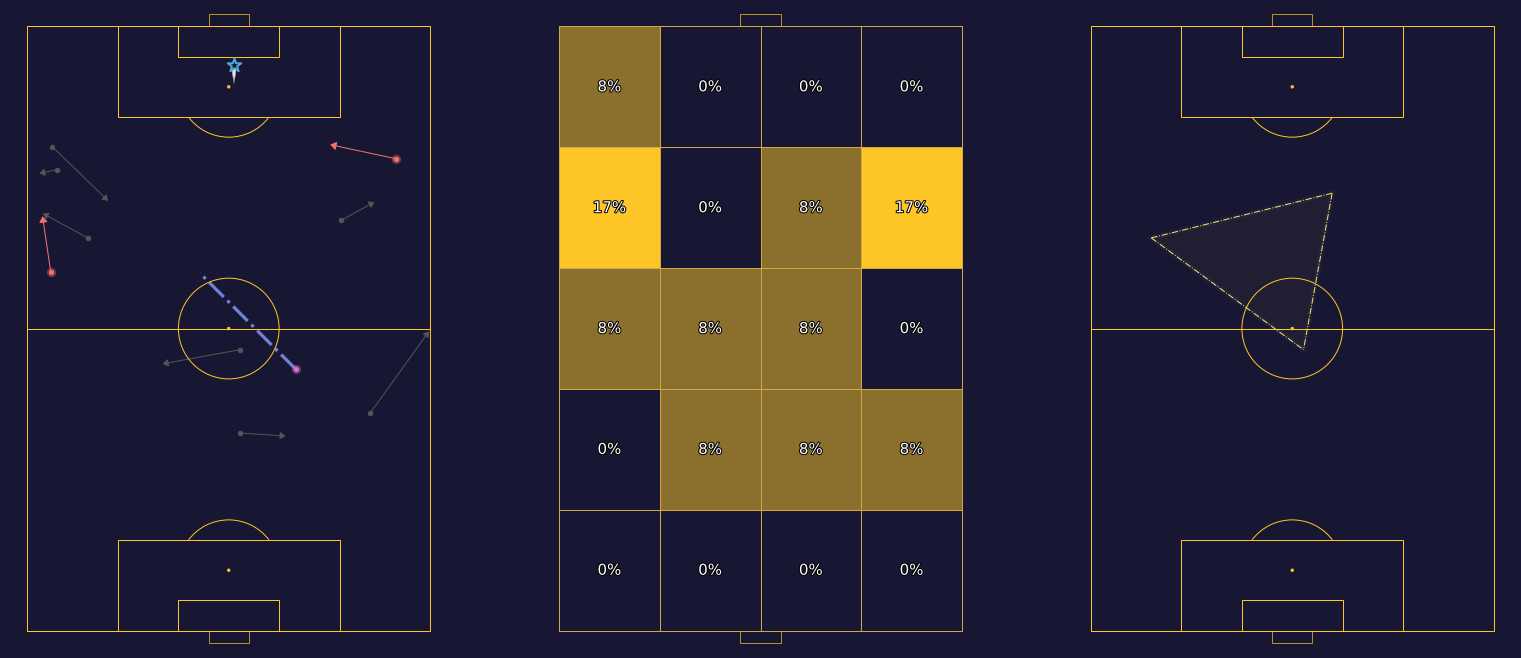

In [12]:
fig, axes = plt.subplots(1,3,figsize=(27,18))

fig_color = "#171733"
fig.set_facecolor(fig_color)
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = fig_color,
    line_color = "#fdc526", 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=1.0
)
axes = axes.ravel()
for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
    
pId = 422937
counts = plotVerticalAndKeyPassMap(df,pId,axes[0],time=95)
carryCount = carryPlot(carryDf,axes[0],pId,teamId,carryDist=(5,120))
shots = plotShotmap(pitch,axes[0],carryDf,pId)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [fig_color, homeColor], N=100)
plotBinStatHeatmap(pitch,axes[1],df,pId,font=myFont,cmap=cmapB,alpha=1)
plotConvexfull(df,pId,axes[2],homeColor)
# plotScatterMap(df,pId,axes[2])
# main(axes[2],teamId,teamName,season,gw,cmapA,kitNum=10)
plotDefensiveAct(df,pId,axes[2])
# plotHeatMap2(df,axes[2],pitch,pId)
# sumXt = plotPassMap(df,pId,axes[3],time=95)
path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()]

for idName in team_players_dict[venue].keys():
    if pId in idName:
        playerName = idName[1]

fig_text(s=f"<{playerName}>",
         x=axes[0].get_position().x0+.03,y=axes[0].get_position().y1+.118,
         color="#ffffff",
         highlight_colors=[homeColor],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=32, path_effects=path_eff,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"Premier League 21-22 | {teamName} vs {df.loc[0,'opponent']}  | Created by:@Bucciaratimes",
         x=axes[0].get_position().x0,y=axes[0].get_position().y1+.09535,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=15,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Pass Comp: {calPassComp(df,pId)}%>\n<Keypass: {counts[0]}> [The final pass leading to a shot]\n\
<Progressive pass: {counts[1]}> [A pass that move the ball towards at least 9m]\n\
<Carry: {carryCount}> [A ball carry that moves the ball at least 5m]\n\
<Shots   :> <Goal:{shots[1]}> - <OnTarget:{shots[2]}> - <OffTarget:{shots[3]}> - <Blocked:{shots[4]}>",
         x=axes[0].get_position().x0+.005,y=axes[0].get_position().y1+.03,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#7280D6","#f8f8f8","gold","#ff5c8a","#4ea8de","#67b99a"],
         highlight_weights=["bold"]*9,
         highlight_styles=["italic"]*9,
         fontsize=13,
         fontproperties=monoBFont.prop,fig=fig)

# ax_image = add_image(
#     mark, fig, left=axes[0].get_position().x0+.230, bottom=axes[0].get_position().y1+.1098, width=0.05, height=0.05, alpha=1) 
# ax_image = add_image(
#     markBr, fig, left=axes[0].get_position().x0-.015, bottom=axes[0].get_position().y1+.1098, width=0.05, height=0.05, alpha=1) 

for i,title in zip(range(len(axes)),["Performance Plot","Heat Map","Territory Plot",f"Threat Plot"]):
    axes[i].text(s=title,color="#f8f8f8",x=40,y=127,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)
    
# # axes[3].text(s=f"xT:{sumXt}",color="#cccccc",x=64,y=122,fontsize=12.8,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop) 
# cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
# colorBar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1, clip=False), cmap=cmap),
#              location="bottom",orientation='horizontal', anchor=(.5,2.2), shrink=.6, ticks=[0, 1], pad=.105, ax=axes[3])
# colorBar.ax.set_xticklabels(["less","more"],fontdict={"color":"white","fontsize":12,"fontproperties":monoBFont.prop})
# colorBar.ax.set_xlabel('xT', color='white', fontdict={"color":"white","fontsize":16,"fontproperties":monoBFont.prop}, rotation=0)

axes[0].scatter(x=axes[0].get_position().x0+71.5,y=axes[0].get_position().y0+133,color=pitchColor,marker="*",zorder=10,ec="#f8f8f8",lw=2,s=200,clip_on=False)

# plt.savefig(f'/work/output/{pId}_{gw}.png', dpi=250, bbox_inches="tight",facecolor=fig_color)

In [ ]:
def touchMap(df,carryDf):    
    fig, axes = plt.subplots(1,3,figsize=(27,18))
    fig_color = "#171733"
    fig.set_facecolor(fig_color)
    pitch = VerticalPitch(
        pitch_type='statsbomb',
        orientation='vertical',
        goal_type = 'box',
        pitch_color = fig_color,
        line_color = "#fdc526", 
        figsize=(13.5,8),
        constrained_layout = True,
        tight_layout = False,
        line_zorder=1, linewidth=1.0
    )
    axes = axes.ravel()
    for i in range(len(axes)):
        pitch.draw(ax=axes[i])
        axes[i].invert_xaxis()

    counts = plotVerticalAndKeyPassMap(df,pId,axes[0],time=95)
    carryCount = carryPlot(carryDf,axes[0],pId,teamId,carryDist=(5,120))
    shots = plotShotmap(pitch,axes[0],carryDf,pId)
    cmapB = LinearSegmentedColormap.from_list("my_cmap", [fig_color, homeColor], N=100)
    plotBinStatHeatmap(pitch,axes[1],df,pId,font=myFont,cmap=cmapB,alpha=1)
    plotConvexfull(df,pId,axes[2],homeColor)
    # plotScatterMap(df,pId,axes[2])
    main(axes[2],teamId,teamName,season,gw,cmapA,kitNum=7)
    # plotHeatMap2(df,axes[2],pitch,pId)
    # sumXt = plotPassMap(df,pId,axes[3],time=95)
    path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
                path_effects.Normal()]
    
    fig_text(s=f"<{playerName}>",
             x=axes[0].get_position().x0+.03,y=axes[0].get_position().y1+.118,
             color="#ffffff",
             highlight_colors=[homeColor],
             highlight_weights=["bold"],
             highlight_styles=["italic"],
             fontsize=32, path_effects=path_eff,
             fontproperties=monoBFont.prop,fig=fig)

    fig_text(s=f"La Liga 21-22 | {teamName} vs {df.loc[0,'opponent']}  | Created by:@Bucciaratimes",
             x=axes[0].get_position().x0,y=axes[0].get_position().y1+.09535,
             color="#f8f8f8",
             highlight_colors=["#cccccc"],
             highlight_weights=["bold"],
             highlight_styles=["italic"],
             fontsize=15,
             fontproperties=monoBFont.prop,fig=fig)

    fig_text(s=f"<Pass Comp: {calPassComp(df,pId)}%>\n<Keypass: {counts[0]}> [The final pass leading to a shot]\n\
<Progressive pass: {counts[1]}> [A pass that move the ball towards at least 9m]\n\
<Carry: {carryCount}> [A ball carry that moves the ball at least 5m]\n\
<Shots   :> <Goal:{shots[1]}> - <OnTarget:{shots[2]}> - <OffTarget:{shots[3]}> - <Blocked:{shots[4]}>",
             x=axes[0].get_position().x0+.005,y=axes[0].get_position().y1+.03,
             color="#8C898C",
             highlight_colors=["#D1FF05","#F5E76B","#F5706C","#7280D6","#f8f8f8","gold","#ff5c8a","#4ea8de","#67b99a"],
             highlight_weights=["bold"]*9,
             highlight_styles=["italic"]*9,
             fontsize=13,
             fontproperties=monoBFont.prop,fig=fig)
    ax_image = add_image(
        mark, fig, left=axes[0].get_position().x0+.175, bottom=axes[0].get_position().y1+.1098, width=0.05, height=0.05, alpha=1) 
    ax_image = add_image(
        mark2, fig, left=axes[0].get_position().x0-.015, bottom=axes[0].get_position().y1+.1098, width=0.05, height=0.05, alpha=1) 

    for i,title in zip(range(len(axes)),["Performance Plot","Heat Map","Territory Plot",f"Threat Plot"]):
        axes[i].text(s=title,color="#f8f8f8",x=40,y=127,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)

    # # axes[3].text(s=f"xT:{sumXt}",color="#cccccc",x=64,y=122,fontsize=12.8,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop) 
    # cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
    # colorBar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1, clip=False), cmap=cmap),
    #              location="bottom",orientation='horizontal', anchor=(.5,2.2), shrink=.6, ticks=[0, 1], pad=.105, ax=axes[3])
    # colorBar.ax.set_xticklabels(["less","more"],fontdict={"color":"white","fontsize":12,"fontproperties":monoBFont.prop})
    # colorBar.ax.set_xlabel('xT', color='white', fontdict={"color":"white","fontsize":16,"fontproperties":monoBFont.prop}, rotation=0)

    axes[0].scatter(x=axes[0].get_position().x0+71.5,y=axes[0].get_position().y0+133,color=pitchColor,marker="*",zorder=10,ec="#f8f8f8",lw=2,s=200,clip_on=False)


    plt.savefig(f'/work/output/{pId}_{gw}.png', dpi=250, bbox_inches="tight",facecolor=fig_color)

# teamName = "barcelona"
pId = 299513
# teamId = 65
# for idName in team_players_dict[venue].keys():
#     if pId in idName:
#         playerName = idName[1]
playerName = "Ousmane Dembélé"
for gw in range(5,38):
    with open(f"/work/assets/whoscored/{teamName}/ids/{season}/{season}#{gw}.json", "rb") as jsonFile:
        team_players_dict = pickle.load(jsonFile)
    xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
    xT = np.array(xT)
    xT_rows, xT_cols = xT.shape

    df = pd.read_csv(f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{gw}.csv")
    isPlayer = len(df[df["playerId"]==pId])
    if isPlayer == 0:
        print(gw)
        continue
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    carryDf = df
    df = df.dropna(subset=["endY"]).reset_index(drop=True)
    df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
    df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
    df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
    df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
    df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df["xT"] = df['end_zone_value'] - df['start_zone_value']

    #     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("passKey",na=False)]
    #     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    df = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]
    touchMap(df,carryDf)


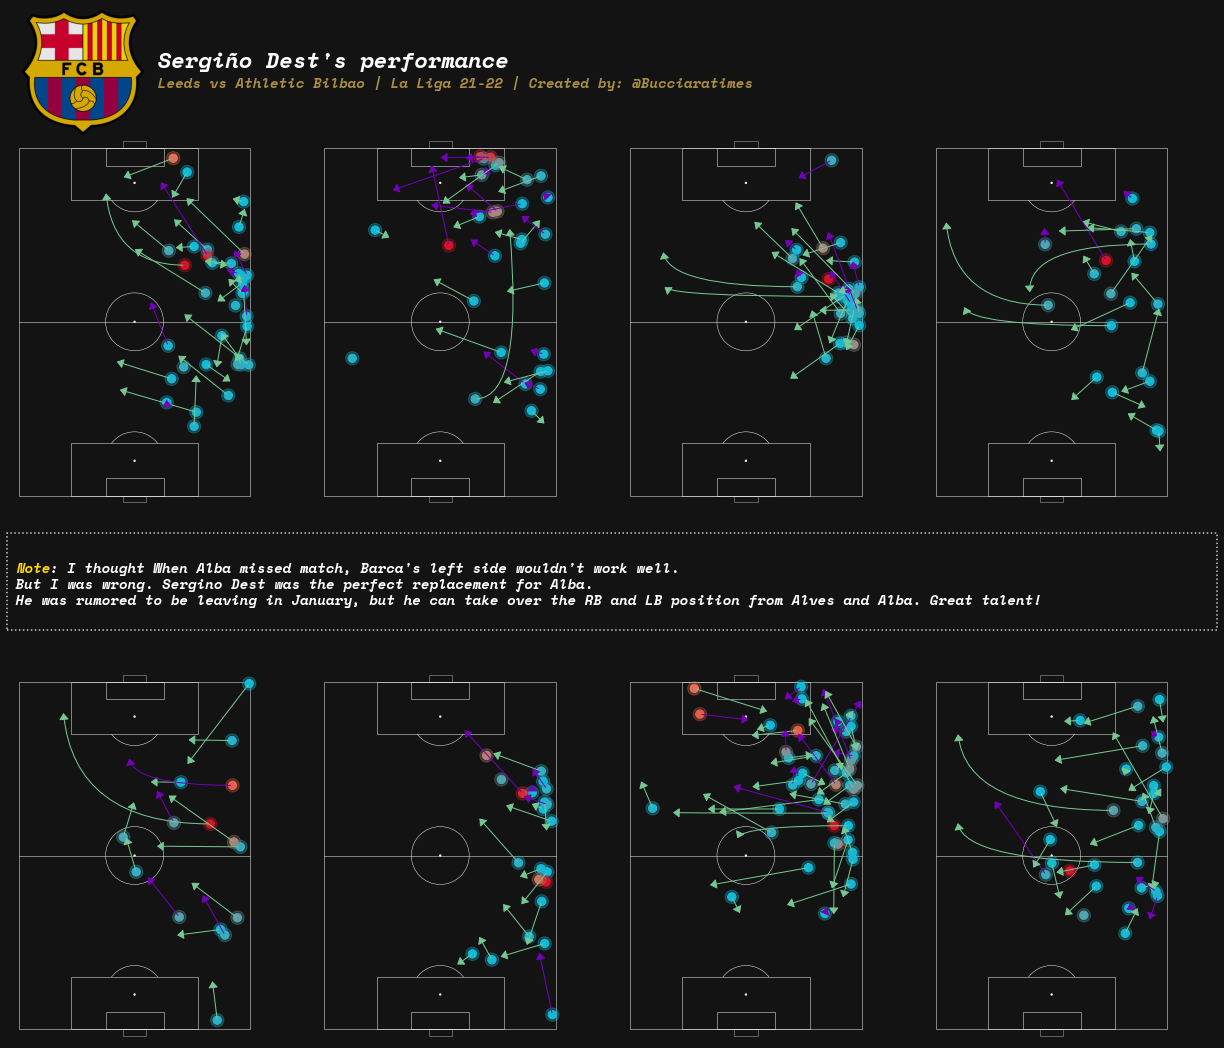

In [10]:
fig, axes = plt.subplots(2,4,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
axes = axes.ravel()
for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
        
idx = 0
pId = 300447
for i in list(range(20,28)):
    df = pd.read_csv(f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv")
    df = df.dropna(subset=["endY"]).reset_index(drop=True)
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
    df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
    df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
    df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
    df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
    df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
    df["xT"] = df['end_zone_value'] - df['start_zone_value']

#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("passKey",na=False)]
#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    df = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]

#     plotHeatmap(df,axes[idx])
    plotPassMap(df,pId,axes[idx],time=95)
#     plotBar(df,axes[idx],xLim=(0,120),color=homeColor,time=95)
    idx+=1
    
path_eff = [path_effects.Stroke(linewidth=1, foreground='#ffffff'),
            path_effects.Normal()]
    
fig_text(s=f"Sergiño Dest's performance",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.05,
         color="#ffffff",
#          highlight_colors=["#ffffff"],
#          highlight_weights=["bold"],
#          highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<{teamName.title()} vs Athletic Bilbao | La Liga 21-22 | Created by: @Bucciaratimes>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.035,
         color="#8C898C",
         highlight_colors=["#AB8E40"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

fig.patches.extend([
        plt.Rectangle(
        (axes[0].get_position().x0,axes[0].get_position().y0-.095),.8,.075,fill=False, alpha=1,
        linestyle=":", edgecolor="#cccccc", linewidth=1.5, zorder=99,
        transform=fig.transFigure, figure=fig)
    ])

fig_text(s=f" <Note>: I thought When Alba missed match, Barca's left side wouldn't work well.\n \
But I was wrong. Sergino Dest was the perfect replacement for Alba.\n \
He was rumored to be leaving in January, but he can take over the RB and LB position from Alves and Alba. Great talent!",
         x=axes[0].get_position().x0,y=axes[0].get_position().y0-.078,
         color="#ffffff",
         highlight_colors=["gold"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

# plotVerticalAndKeyPassMap(df,379205,axes[1])
# plotConvexfull(df,379205,axes[1])
# plotScatterMap(df,379205,axes[1])
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1, width=0.1, height=0.1, alpha=.9)  
# plotBinStatHeatmap(pitch,axes[1],df,379205,monoBFont.prop,cmapA,alpha=1)
# fig_text(x=0.51, y=0.92, s=f'<touch area>',
#          fontsize=58, ha='center', highlight_colors=["gray"], highlight_weights=['bold'])#, path_effects=path_eff_1)
# fig_text(x=0.51, y=0.89, s=f'Laliga 21/22 | Gameweek 1~5',
#          fontsize=24, ha='center', color='gray')#, path_effects=path_eff)
# fig_text(x=0.51, y=0.82, s=f'<{teamName}>'.title(),
#          fontsize=48, ha='center', highlight_colors=[homeColor], highlight_weights=['bold'], path_effects=path_eff)


# plt.savefig(f'/work/output/barcelona/distribution.png', dpi=200, bbox_inches="tight",facecolor='#131313')

### Coutinho  Aston villa vs Barcelona

In [3]:
import pickle
import main_ver03 as main03

dfts = []
season = 2122
teamName = "barcelona"
for i in range(1,39):
    with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv", mode="rb") as file:
        events_df = pd.read_csv(file)
    dfts.append(events_df)
dfA = pd.concat(dfts)


dfvs = []
season = 2122
teamName = "betis"
for i in range(1,39):
    try:
        with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv", mode="rb") as file:
              events_df = pd.read_csv(file)
        dfvs.append(events_df)
    except:
        pass
dfB = pd.concat(dfvs)

dfA["x"] = dfA["x"]*1.2
dfA["y"] = dfA["y"]*.8
dfA["endX"] = dfA["endX"]*1.2
dfA["endY"] = dfA["endY"]*.8

dfB["x"] = dfB["x"]*1.2
dfB["y"] = dfB["y"]*.8
dfB["endX"] = dfB["endX"]*1.2
dfB["endY"] = dfB["endY"]*.8

df_villa = dfA
df_barca = dfB

In [4]:
def plotVerticalAndKeyPassMap(df,playerId,ax,time=None):
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]

    pdf['dist1']=np.sqrt((120-pdf.x)**2 + (40-pdf.y)**2)
    pdf['dist2']=np.sqrt((120-pdf.endX)**2 + (40-pdf.endY)**2)
    pdf['distdiff'] = pdf['dist1']-pdf['dist2']
    keyCount = len(pdf[pdf["satisfiedEventsTypes"].apply(str).str.contains("passKey",na=False)])
    verticalCount = 0
    for index, row in pdf.iterrows():
        
        if 'passKey' in row["satisfiedEventsTypes"]:
            ax.scatter(row["y"],row["x"],color="#F5E76B",s=20,zorder=1)  
            ax.scatter(row["y"],row["x"],color="#F5E76B",s=70,alpha=.3,zorder=1) 
            ax.annotate("",
                        xy=(row['endY'],row['endX']),
                        xytext=(row["y"],row["x"]),
                        arrowprops={'arrowstyle':"-|>,head_width=.35,head_length=.5",
                                    'fc':'#F5E76B','ec':'#F5E76B'},
                        zorder=1)
    return (keyCount,verticalCount)

def plotScatterMap(df,playerId,ax,time=None):
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']
    meanX = pdf["x"].median()
    meanY = pdf["y"].median()
    
    ax.scatter(meanY,meanX,facecolor="#cccccc",edgecolor='gold',s=300*4, 
        marker="h",alpha=.35,
        linewidth=3,linestyle="--",
        zorder=99)
    ax.scatter(meanY,meanX,facecolor="#ffffff",edgecolor='gold',s=335*2, 
        marker="h",alpha=1,
        linewidth=3,linestyle="--",
        label='Mål',zorder=99)

color1 = "#fb6f92"
color2 = "#f48c06"
def carryPlot(df,ax,playerId,teamId=None,carryDist=(9,120)):
    df = df[df["teamId"]==teamId]
    df = df[["playerId","x","y","endX","endY"]]
    df['startX'] = df['endX'].shift(+1)
    df['startY'] = df['endY'].shift(+1)
    df['carry1']=np.sqrt((120-df.startX)**2 + (40-df.startY)**2)
    df['carry2']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['carrydist'] = df['carry1']-df['carry2']
    df = df.query(f"(carrydist>={carryDist[0]} and carrydist<={carryDist[1]}) and playerId=={playerId}").dropna()
    if teamId == 65:
        for idx,row in df.iterrows():
            ax.annotate("",
                        xy=(row["y"],row["x"]),
                        xytext=(row['startY'],row['startX']),
                        arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=0.5",
                                    'linestyle':':',
                                    'linewidth':1,
                                    'fc':'#171733',
                                    'ec':color1},
                        zorder=.5)
    else:
        for idx,row in df.iterrows():
            ax.annotate("",
                        xy=(row["y"],row["x"]),
                        xytext=(row['startY'],row['startX']),
                        arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=0.5",
                                    'linestyle':':',
                                    'linewidth':1,
                                    'fc':'#171733',
                                    'ec':color2},
                        zorder=.5)
    return len(df)

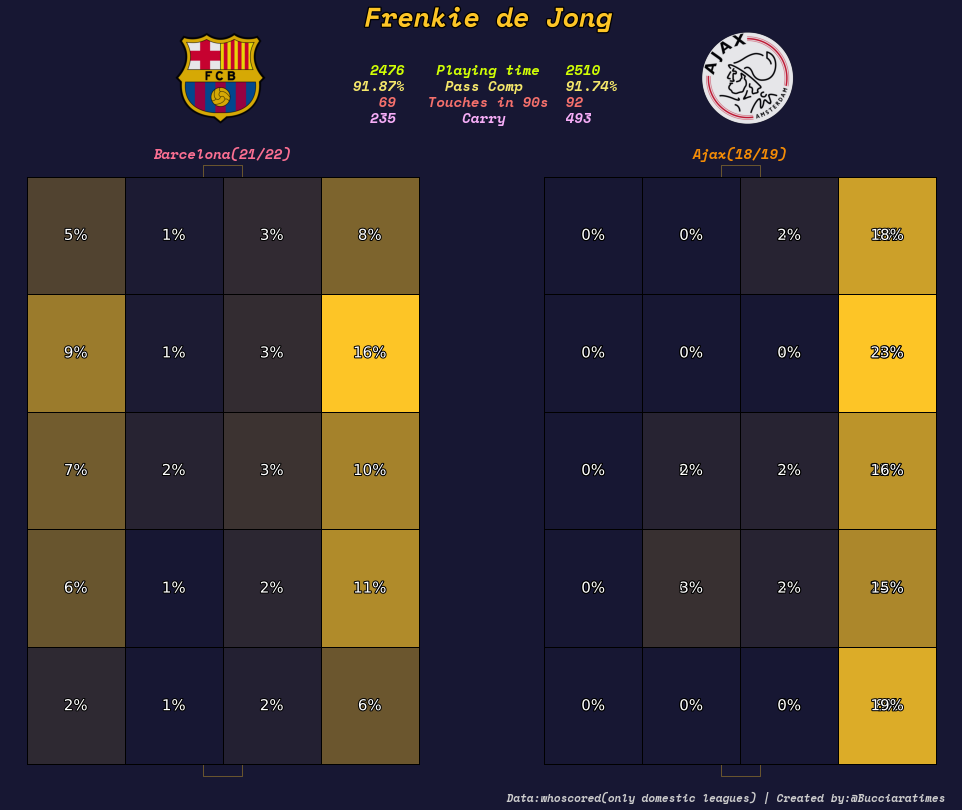

In [6]:
fig,axes = plt.subplots(1,2,figsize=(17,13))
fig.set_facecolor("#171733")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = "#171733",
    line_color = "#fdc526", 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=20
)
axes = axes.ravel()
for i in range(2):
    pitch.draw(ax=axes[i], tight_layout=True)
    axes[i].invert_xaxis()
    
path_eff = [path_effects.Stroke(linewidth=1.9, foreground='#D7B013'),
            path_effects.Normal()]

pId = 379205
pId2 = 125211

def calPassComp(df,playerId):
    passDf = df[df["playerId"]==playerId]
    passAc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassAccurate",na=False)]
    passIc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassInaccurate",na=False)]
    passComp = round((len(passAc)/(len(passAc)+len(passIc)))*100,2)
    return passComp
idx = 0
cmapB = LinearSegmentedColormap.from_list("my_cmap", ["#171733", "#fdc526"], N=100)
for df in [df_villa,df_barca]:
#     counts = plotVerticalAndKeyPassMap(df=df,playerId=pId,ax=axes[idx],time=90)
    if idx == 1:  
        plotBinStatHeatmap(pitch,axes[idx],df,pId2,font=myFont,cmap=cmapB,alpha=1)
    plotBinStatHeatmap(pitch,axes[idx],df,pId,font=myFont,cmap=cmapB,alpha=1)
    
#         carryPlot(df,ax=axes[idx],playerId=pId,teamId=130,carryDist=(5,120))
#     carryPlot(df,ax=axes[idx],playerId=pId2,teamId=65,carryDist=(5,120))
# #     plotScatterMap(df,pId,axes[idx])
#     fig_text(s=f"The final pass leading to a shot",
#          #<Progressive pass:> A pass that move the ball towards at least 9m.",
#      x=axes[idx].get_position().x0+.01,y=axes[idx].get_position().y1-.015,
#      color="#8C898C",
# #      highlight_colors=["#D1FF05","#F5E76B"],
# #                        #,"#F5706C"],
# #      highlight_weights=["bold","bold"],#"bold"],
# #      highlight_styles=["italic","italic"],#"italic"],
#      fontsize=13,
#      fontproperties=monoBFont.prop,fig=fig)
#     fig_text(s=f"<Pass Comp: {calPassComp(df,pId)}%>\n<Keypass: {counts[0]}> The final pass leading to a shot",
#              #<Progressive pass:> A pass that move the ball towards at least 9m.",
#              x=axes[idx].get_position().x0+.01,
#              y=axes[idx].get_position().y1-.015,
#              color="#8C898C",
#              highlight_colors=["#D1FF05","#F5E76B"],
#                                #,"#F5706C"],
#              highlight_weights=["bold","bold"],#"bold"],
#              highlight_styles=["italic","italic"],#"italic"],
#              fontsize=13,
#              fontproperties=monoBFont.prop,fig=fig)
    idx+=1

path_eff = [path_effects.Stroke(linewidth=2.5, foreground='black'),
            path_effects.Normal()]
fig_text(s=f"<                  2476>\n\
<                91.87%>\n\
<                   69>\n\
<                  235>",
         x=axes[0].get_position().x0+.1695,y=axes[0].get_position().y1-.05,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#f7aef8"],
         highlight_weights=["bold"]*4,
         highlight_styles=["italic"]*4,
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<    Playing time   2510>\n\
<     Pass Comp     91.74%>\n\
<   Touches in 90s  92>\n\
<       Carry       493>",
         x=axes[1].get_position().x0-0.1,y=axes[1].get_position().y1-.05,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#f7aef8"],
         highlight_weights=["bold"]*4,
         highlight_styles=["italic"]*4,
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Frenkie de Jong>",
         x=axes[0].get_position().x0+.292,y=axes[0].get_position().y1+.05,
         color="#ffffff",
         highlight_colors=["#fdc526"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=27, 
         path_effects=path_eff,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f" Data:whoscored(only domestic leagues) | Created by:@Bucciaratimes",
         x=axes[0].get_position().x1+0.05,y=axes[0].get_position().y0-0.02,
         color="#cccccc",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=11,
         fontproperties=monoBFont.prop,fig=fig)

axes[0].set_title("Barcelona(21/22)",color=color1,y=axes[0].get_position().y1,
                  fontsize=14,
                  fontweight="bold",
                  fontproperties=monoBFont.prop)
axes[1].set_title("Ajax(18/19)",color=color2,y=axes[1].get_position().y1,
                  fontsize=14,
                  fontweight="bold",
                  fontproperties=monoBFont.prop)
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x1/2+0.01, bottom=axes[0].get_position().y1-.05, width=0.1, height=0.1, alpha=.9)  
ax_image = add_image(
    mark5, fig, left=axes[1].get_position().x1-0.22, bottom=axes[1].get_position().y1-.05, width=0.1, height=0.1, alpha=.9)
# ax_image = add_image(
#     mark3, fig, left=axes[0].get_position().x0+.19, bottom=axes[1].get_position().y1+.055, width=0.07, height=0.07, alpha=1)
# plt.savefig(f'/work/output/{pId}27dd88877777d.png', dpi=300, bbox_inches="tight",facecolor='#171733')


### Season

In [8]:
color1 = "#fb6f92"
color2 = "#f48c06"
color3 = "#c0fdff"
def carryPlot(df,ax,playerId,teamId=None,carryDist=(9,120)):
    df = df[df["teamId"]==teamId]
    df = df[["playerId","x","y","endX","endY"]]
    df['startX'] = df['endX'].shift(+1)
    df['startY'] = df['endY'].shift(+1)
    df['carry1']=np.sqrt((120-df.startX)**2 + (40-df.startY)**2)
    df['carry2']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
    df['carrydist'] = df['carry1']-df['carry2']
    df = df.query(f"(carrydist>={carryDist[0]} and carrydist<={carryDist[1]}) and playerId=={playerId}").dropna()
    if teamId == 65:
        for idx,row in df.iterrows():
            ax.annotate("",
                        xy=(row["y"],row["x"]),
                        xytext=(row['startY'],row['startX']),
                        arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=0.5",
                                    'linestyle':':',
                                    'linewidth':1,
                                    'fc':'#171733',
                                    'ec':color1},
                        zorder=.5)
    elif teamId == 130:
        for idx,row in df.iterrows():
            ax.annotate("",
                        xy=(row["y"],row["x"]),
                        xytext=(row['startY'],row['startX']),
                        arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=0.5",
                                    'linestyle':':',
                                    'linewidth':1,
                                    'fc':'#171733',
                                    'ec':color2},
                        zorder=.5)
    else:
        for idx,row in df.iterrows():
            ax.annotate("",
                        xy=(row["y"],row["x"]),
                        xytext=(row['startY'],row['startX']),
                        arrowprops={'arrowstyle':"-|>,head_width=.3,head_length=0.5",
                                    'linestyle':':',
                                    'linewidth':1,
                                    'fc':'#171733',
                                    'ec':color3},
                        zorder=.5)
#     ax.scatter(df["startY"],df["startX"],color="#fbfefb",s=20,zorder=1)  
#     ax.scatter(df["startY"],df["startX"],color="#fbfefb",s=70,alpha=.3,zorder=1) 
    return len(df)

def calPassComp(df,playerId,teamId):
    df = df[df["teamId"]==teamId]
    passDf = df[df["playerId"]==playerId]
    passAc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassAccurate",na=False)]
    passIc = passDf[passDf["satisfiedEventsTypes"].apply(str).str.contains("PassInaccurate",na=False)]
    passComp = round((len(passAc)/((len(passAc)+len(passIc))))*100,2)
    return passComp

def plotScatterMap(df,playerId,ax,time=None):
    df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    pdf = df[df['playerId']==playerId]    
    if time is not None:
        pdf = pdf[pdf["minute"]<time]
        
    x = pdf['x']
    y = pdf['y']
    endX = pdf['endX']
    endY = pdf['endY']
    meanX = pdf["x"].median()
    meanY = pdf["y"].median()
    
    ax.scatter(meanY,meanX,facecolor="#cccccc",edgecolor='gold',s=100*4, 
        marker="h",alpha=.35,
        linewidth=3,linestyle="--",
        zorder=99)
    ax.scatter(meanY,meanX,facecolor="#ffffff",edgecolor='gold',s=135*2, 
        marker="h",alpha=1,
        linewidth=3,linestyle="--",
        label='Mål',zorder=99)

In [6]:
dfts = []
season = 1819
teamName = "ajax"
for i in range(1,39):
    try:
        with open(file=f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv", mode="rb") as file:
            events_df = pd.read_csv(file)
        dfts.append(events_df)
    except:
        print("nofile")
    try:
        with open(file=f"/work/assets/whoscored/barcelona/match/2122/eventsData/new/2122#{i}.csv", mode="rb") as file:
            events_df = pd.read_csv(file)
        dfts.append(events_df)
    except:
        print("no file")
    try:
        with open(file=f"/work/assets/whoscored/city/match/2122/eventsData/new/2122#{i}.csv", mode="rb") as file:
            events_df = pd.read_csv(file)
        dfts.append(events_df)
    except:
        print("no file")
df = pd.concat(dfts)

xT = pd.read_csv("/work/assets/xT_Grid.csv",header=None)
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

df['x']=df['x']*1.2
df['endX']=df['endX']*1.2
df['y']=df['y']*0.8
df['endY']=df['endY']*0.8
df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
carryDf = df
df = df.dropna(subset=["endY"]).reset_index(drop=True)
df["x_bin"] = pd.cut(x=df["x"],bins=xT_cols,labels=False)
df["y_bin"] = pd.cut(x=df["y"],bins=xT_rows,labels=False)
df["endX_bin"] = pd.cut(x=df["endX"],bins=xT_cols,labels=False)
df["endY_bin"] = pd.cut(x=df["endY"],bins=xT_rows,labels=False)
df["start_zone_value"] = df[["x_bin","y_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["end_zone_value"] = df[["endX_bin","endY_bin"]].apply(lambda x: xT[x[1]][x[0]], axis=1)
df["xT"] = df['end_zone_value'] - df['start_zone_value']

nofile
nofile
nofile
nofile


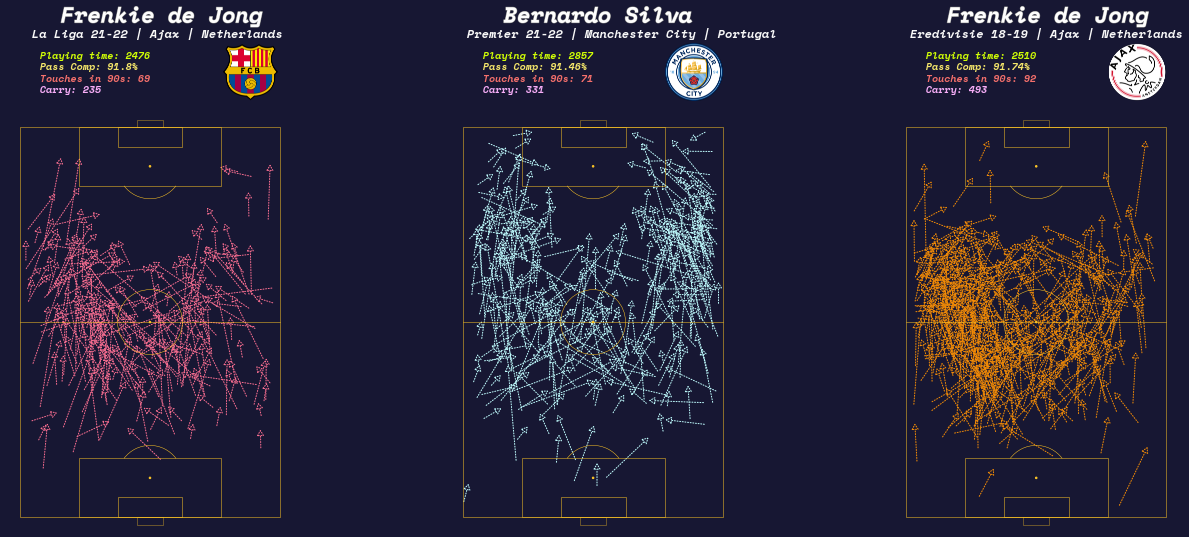

In [10]:
fig, axes = plt.subplots(1,3,figsize=(22.5,8))
fig.set_facecolor("#171733")
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = "#171733",
    line_color = "#fdc526", 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5,
    pad_top=10
)
axes = axes.ravel()
for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
pId = 279423
teamId = 65
# sumXt = plotPassMap(df,pId,axes[3],time=95)
cmapB = LinearSegmentedColormap.from_list("my_cmap", ["#131313", homeColor], N=100)
# plotBinStatHeatmap(pitch,axes[1],df,pId,font=myFont,cmap=cmapB,alpha=1)
# plotConvexfull(df,pId,axes[2],homeColor)
# plotScatterMap(df,pId,axes[2])
# main(axes[2],teamId,teamName,season,gw,cmapA,kitNum=22)
# counts = plotVerticalAndKeyPassMap(df,pId,axes[0],time=95)
carryCount = carryPlot(carryDf,axes[0],pId,teamId,carryDist=(5,120))
# plotScatterMap(df[df["teamId"]==teamId],pId,axes[0])

# shots = plotShotmap(pitch,axes[0],carryDf,pId)

path_eff = [path_effects.Stroke(linewidth=1, foreground='gray'),
            path_effects.Normal()]

# for idName in team_players_dict[venue].keys():
#     if pId in idName:
#         playerName = idName[1]
        
fig_text(s=f"<Frenkie de Jong>",
         x=axes[0].get_position().x0+.033,y=axes[0].get_position().y1+.1185,
         color="#ffffff",
#          highlight_colors=[homeColor],
         highlight_colors=["#fefefe"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22, path_effects=path_eff,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"La Liga 21-22 | {teamName.title()} | Netherlands",
         x=axes[0].get_position().x0+.015,y=axes[0].get_position().y1+.09535,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=12,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Playing time: 2476>\n\
<Pass Comp: {calPassComp(df,pId,teamId)}%>\n\
<Touches in 90s: {round(1908/27.5)}>\n\
<Carry: 235>",
         x=axes[0].get_position().x0+.02,y=axes[0].get_position().y1,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#f7aef8"],
         highlight_weights=["bold"]*4,
         highlight_styles=["italic"]*4,
         fontsize=10,
         fontproperties=monoBFont.prop,fig=fig)

teamId2 = 167
pId = 136741
carryCount = carryPlot(carryDf,axes[1],pId,teamId=teamId2,carryDist=(5,120))
# plotScatterMap(df[df["teamId"]==teamId2],pId,axes[1])

# counts = plotVerticalAndKeyPassMap(df,pId,axes[1],time=95)

fig_text(s=f"<Bernardo Silva>",
         x=axes[1].get_position().x0+.033,y=axes[1].get_position().y1+.1185,
         color="#ffffff",
#          highlight_colors=[homeColor],
         highlight_colors=["#fefefe"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22, path_effects=path_eff,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"Premier 21-22 | Manchester City | Portugal",
         x=axes[1].get_position().x0+.01,y=axes[1].get_position().y1+.09535,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=12,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Playing time: 2857>\n\
<Pass Comp: {calPassComp(df,pId,teamId2)}%>\n\
<Touches in 90s: {round(2244/31.7)}>\n\
<Carry: {carryCount}>",
         x=axes[1].get_position().x0+.02,y=axes[0].get_position().y1,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#f7aef8"],
         highlight_weights=["bold"]*4,
         highlight_styles=["italic"]*4,
         fontsize=10,
         fontproperties=monoBFont.prop,fig=fig)

teamId3 = 130
pId = 279423
carryCount = carryPlot(carryDf,axes[2],pId,teamId=teamId3,carryDist=(5,120))
# plotScatterMap(df[df["teamId"]==teamId3],pId,axes[2])

fig_text(s=f"<Frenkie de Jong>",
         x=axes[2].get_position().x0+.033,y=axes[2].get_position().y1+.1185,
         color="#ffffff",
#          highlight_colors=[homeColor],
         highlight_colors=["#fefefe"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=22, path_effects=path_eff,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"Eredivisie 18-19 | Ajax | Netherlands",
         x=axes[2].get_position().x0+.01,y=axes[2].get_position().y1+.09535,
         color="#f8f8f8",
         highlight_colors=["#cccccc"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=12,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<Playing time: 2510>\n\
<Pass Comp: {calPassComp(df,pId,teamId3)}%>\n\
<Touches in 90s: 92>\n\
<Carry: {carryCount}>",
         x=axes[2].get_position().x0+.02,y=axes[2].get_position().y1,
         color="#8C898C",
         highlight_colors=["#D1FF05","#F5E76B","#F5706C","#f7aef8"],
         highlight_weights=["bold"]*4,
         highlight_styles=["italic"]*4,
         fontsize=10,
         fontproperties=monoBFont.prop,fig=fig)

mark_width = 0.1
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0+.1, bottom=axes[0].get_position().y1-0.01, width=mark_width, height=mark_width, alpha=1) 
# ax_image = add_image(
#     mark2, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1+.118, width=mark_width, height=mark_width, alpha=1) 

ax_image = add_image(
    mark3, fig, left=axes[1].get_position().x0+.1, bottom=axes[0].get_position().y1-0.01, width=mark_width, height=mark_width, alpha=1) 
# ax_image = add_image(
#     mark4, fig, left=axes[1].get_position().x0, bottom=axes[0].get_position().y1+.118, width=mark_width, height=mark_width, alpha=1) 

ax_image = add_image(
    mark5, fig, left=axes[2].get_position().x0+.1, bottom=axes[0].get_position().y1-0.01, width=mark_width, height=mark_width, alpha=1) 
# ax_image = add_image(
#     mark7, fig, left=axes[2].get_position().x0, bottom=axes[0].get_position().y1+.118, width=mark_width, height=mark_width, alpha=1) 


# for i,title in zip(range(len(axes)),["Performance Plot","Heat Map","Territory Plot",f"Threat Plot"]):
#     axes[i].text(s=title,color="#f8f8f8",x=40,y=127,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)

# axes[3].text(s=f"xT:+{sumXt}",color="#cccccc",x=64,y=122,fontsize=12.8,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop) 
# cmap = mpl.colors.LinearSegmentedColormap.from_list('cmap', ["#13B9D6","#e76f51","#D61327"])
# colorBar = fig.colorbar(cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=0, vmax=1, clip=False), cmap=cmap),
#              location="bottom",orientation='horizontal', anchor=(.5,2.2), shrink=.6, ticks=[0, 1], pad=.105, ax=axes[3])

# colorBar.ax.set_xticklabels(["less","more"],fontdict={"color":"white","fontsize":12,"fontproperties":monoBFont.prop})
# colorBar.ax.set_xlabel('xT', color='white', fontdict={"color":"white","fontsize":16,"fontproperties":monoBFont.prop}, rotation=0)

# axes[0].scatter(x=axes[0].get_position().x0+67,y=axes[0].get_position().y0+136.3,color=pitchColor,marker="*",zorder=10,ec="#f8f8f8",lw=2,s=200,clip_on=False)


plt.savefig(f'/work/output/dfdfdffdf24.png', dpi=300, bbox_inches="tight",facecolor='#171733')

In [148]:
sns.set(context="notebook")
teamId = 65
test_df = df[(df["teamId"]==teamId)]
test_df = test_df[["teamId","playerId","x","y","endX","endY"]]
test_df['startX'] = test_df['endX'].shift(+1)
test_df['startY'] = test_df['endY'].shift(+1)
test_df['carry1']=np.sqrt((120-test_df.startX)**2 + (40-test_df.startY)**2)
test_df['carry2']=np.sqrt((120-test_df.x)**2 + (40-test_df.y)**2)
test_df['carrydist'] = test_df['carry1']-test_df['carry2']
test_df1 = test_df.query(f"(carrydist>=5 and carrydist<=120) and playerId==279423").dropna()

#     Lines = pitch.lines(xstart=df["startX"],ystart=df["startY"],xend=df["x"],yend=df["y"],

In [149]:
test_df = df[df["teamId"]==130]
test_df = test_df[["teamId","playerId","x","y","endX","endY"]]
test_df['startX'] = test_df['endX'].shift(+1)
test_df['startY'] = test_df['endY'].shift(+1)
test_df['carry1']=np.sqrt((120-test_df.startX)**2 + (40-test_df.startY)**2)
test_df['carry2']=np.sqrt((120-test_df.x)**2 + (40-test_df.y)**2)
test_df['carrydist'] = test_df['carry1']-test_df['carry2']
test_df3 = test_df.query(f"(carrydist>=5 and carrydist<=120) and playerId==279423").dropna()

In [150]:
test_df = df[df["teamId"]==167]
test_df = test_df[["teamId","playerId","x","y","endX","endY"]]
test_df['startX'] = test_df['endX'].shift(+1)
test_df['startY'] = test_df['endY'].shift(+1)
test_df['carry1']=np.sqrt((120-test_df.startX)**2 + (40-test_df.startY)**2)
test_df['carry2']=np.sqrt((120-test_df.x)**2 + (40-test_df.y)**2)
test_df['carrydist'] = test_df['carry1']-test_df['carry2']
test_df2 = test_df.query(f"(carrydist>=5 and carrydist<=120) and playerId==136741").dropna()

In [151]:
tdf = pd.concat([test_df1,test_df2,test_df3])

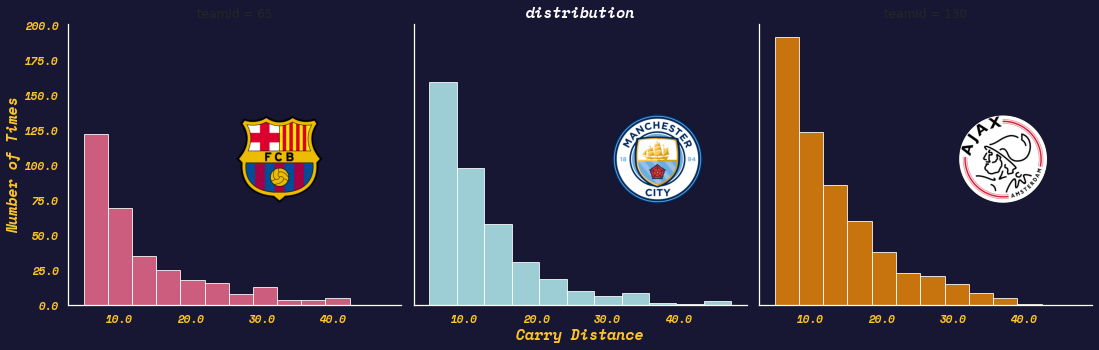

In [217]:
color_sets = {'color': [color1, color2, color3]}
grid = sns.FacetGrid(tdf, col='teamId', hue='teamId', col_order=[65,167,130], hue_kws=color_sets,
                     col_wrap=3, size=5)
g = grid.map(sns.distplot, 'carrydist', bins=11, kde=False,
             kde_kws={"lw": 2, "label": "KDE"},
             hist_kws={"histtype": "barstacked", "linewidth": 1, "edgecolor":"white", "alpha": 0.8}
            )
# g.fig.suptitle("Frenkie de jong")
# g.set_titles("")  # use this argument literally
# g.set_axis_labels(x_var="Dribble Distance(meter)", y_var="Number of times")

fig = plt.gcf()
fig_color = "#171733"
fig.set_facecolor(fig_color)

axes = g.axes
for i in range(len(axes)):
    axes[i].set_facecolor(fig_color)
    axes[i].xaxis.label.set_color('white')
    axes[i].yaxis.label.set_color('white')  
    axes[i].xaxis.label.set_fontsize(14)  
    axes[i].set_xlabel("")
    axes[1].set_xlabel("Carry Distance",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
    axes[0].set_ylabel("Number of Times",fontsize=15,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
    axes[1].set_title("", fontweight='bold', fontsize=18, color="#fdc526",fontproperties=monoBFont.prop)
    axes[i].spines["top"].set_visible(False)
    axes[i].spines["right"].set_visible(False)
    axes[i].grid(None)
    axes[i].set_yticklabels(axes[i].get_yticks(),color="#fec526",fontsize=11,fontweight="bold",fontproperties=monoBFont.prop)
    axes[i].set_xticklabels(axes[i].get_xticks(),color="#fec526",fontsize=11,fontweight="bold",fontproperties=monoBFont.prop)
    axes[1].set_title("distribution",color="white",fontsize=15)
    
# The color cycles are going to all the same, doesn't matter which axes we use
# Ax = g.axes[1]
# legend_labels  = ["Barca-Frenke","Bernardo","Ajax-Frenkie"]
# Boxes = [item for item in Ax.get_children()
#          if isinstance(item, mpl.patches.Rectangle)][:-1]
# # Create the legend patches
# legend_patches = [mpl.patches.Patch(color=C, label=L) for
#                   C, L in zip([g.axes[0].get_children()[0].get_facecolor(),
#                                g.axes[1].get_children()[0].get_facecolor(),
#                                g.axes[2].get_children()[0].get_facecolor()],
#                               legend_labels)]
# legend = plt.legend(handles=legend_patches,labelcolor="#fdc526",prop=monoBFont.prop,facecolor="#171733",
#                     title_fontsize=33,borderpad=2)

mark_width = 0.25
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0+.07, bottom=axes[0].get_position().y1-0.5, width=mark_width, height=mark_width, alpha=1) 
# ax_image = add_image(
#     mark2, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1+.118, width=mark_width, height=mark_width, alpha=1) 

ax_image = add_image(
    mark3, fig, left=axes[1].get_position().x0+.1, bottom=axes[0].get_position().y1-0.5, width=mark_width, height=mark_width, alpha=1) 
# ax_image = add_image(
#     mark4, fig, left=axes[1].get_position().x0, bottom=axes[0].get_position().y1+.118, width=mark_width, height=mark_width, alpha=1) 

ax_image = add_image(
    mark5, fig, left=axes[2].get_position().x0+.1, bottom=axes[0].get_position().y1-0.5, width=mark_width, height=mark_width, alpha=1) 


plt.savefig(f'/work/output/2dffdf1.png', dpi=200, bbox_inches="tight")

In [83]:
# df = df[["playerId","x","y","endX","endY"]]
# df['startX'] = df['endX'].shift(+1)
# df['startY'] = df['endY'].shift(+1)
# df['carry1']=np.sqrt((120-df.startX)**2 + (40-df.startY)**2)
# df['carry2']=np.sqrt((120-df.x)**2 + (40-df.y)**2)
# df['carrydist'] = df['carry1']-df['carry2']
# df = df[~df["carrydist"].isna()]
# df.query(f"carrydist>=30 and playerId=={pId}").dropna()
# !cat function.py

sturges = lambda n: math.ceil(math.log2(n*2))

sturges(len(tdf['carrydist']))


12

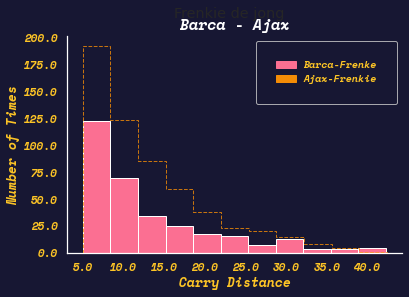

In [240]:
# g =sns.distplot(tdf[tdf["teamId"]==304]["carrydist"], bins=9, kde=False)

sns.distplot(tdf[tdf["teamId"]==65]["carrydist"], bins=11, kde=False, color=color1,
             kde_kws={"lw": 2, "label": "KDE"}, 
             hist_kws={"histtype": "bar", "linewidth": 1,
                       "edgecolor":"white",
                       "alpha": 1}
            )
sns.distplot(tdf[tdf["teamId"]==130]["carrydist"], bins=11, kde=False,color=color2,
             kde_kws={"lw": 2, "label": "KDE"}, 
             hist_kws={"histtype": "step", "linestyle":"--", "linewidth": 1,
                       "edgecolor":color2,
                       "alpha": 0.8}
            )

plt.gcf().suptitle("Frenkie de jong")
# g.set_titles("")  # use this argument literally
# g.set_titles("")  # use this argument literally
plt.gca().set_xlabel(xlabel="Dribble Distance(meter)")
plt.gca().set_ylabel(ylabel="Number of times")

# The color cycles are going to all the same, doesn't matter which axes we use
# Ax = g.axes[1]
Ax = plt.gca()
legend_labels  = ["Barca-Frenke","Ajax-Frenkie"]
Boxes = [item for item in Ax.get_children()
         if isinstance(item, mpl.patches.Rectangle)][:-1]
# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for
                  C, L in zip([color1,color2],
                              legend_labels)]
legend = plt.legend(handles=legend_patches,labelcolor="#fdc526",prop=monoBFont.prop,facecolor="#171733",
       title_fontsize=33,borderpad=2)


fig = plt.gcf()
fig_color = "#171733"
fig.set_facecolor(fig_color)
axes = plt.gca()
axes.set_facecolor(fig_color)
axes.xaxis.label.set_color('white')
axes.yaxis.label.set_color('white')  
axes.xaxis.label.set_fontsize(14)  
axes.set_xlabel("Carry Distance",fontsize=13,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
axes.set_ylabel("Number of Times",fontsize=13,fontweight='bold',color="#fdc526",fontproperties=monoBFont.prop)
axes.spines["top"].set_visible(False)
axes.spines["right"].set_visible(False)
axes.grid(None)
axes.set_yticklabels(axes.get_yticks(),color="#fec526",fontsize=11,fontweight="bold",fontproperties=monoBFont.prop)
axes.set_xticklabels(axes.get_xticks(),color="#fec526",fontsize=11,fontweight="bold",fontproperties=monoBFont.prop)
axes.set_title("Barca - Ajax",color="#ffffff",fontsize=15,fontweight="bold",fontproperties=monoBFont.prop)

plt.savefig(f'/work/output/6dfdfdf6.png', dpi=200, bbox_inches="tight")

In [30]:
barca_carry_num = []
ajax_carry_num = []
for i in range(1,39):
    try:
        with open(file=f"/work/assets/whoscored/barcelona/match/{season}/eventsData/new/{season}#{i}.csv", mode="rb") as file:
            events_df = pd.read_csv(file)
        test_df = events_df[events_df["teamId"]==65]
        test_df = test_df[["teamId","playerId","x","y","endX","endY"]]
        test_df['startX'] = test_df['endX'].shift(+1)
        test_df['startY'] = test_df['endY'].shift(+1)
        test_df['carry1']=np.sqrt((120-test_df.startX)**2 + (40-test_df.startY)**2)
        test_df['carry2']=np.sqrt((120-test_df.x)**2 + (40-test_df.y)**2)
        test_df['carrydist'] = test_df['carry1']-test_df['carry2']
        test_df = test_df.query(f"(carrydist>=5 and carrydist<=120) and playerId==279423").dropna()
        barca_carry_num.append(len(test_df))
    except:
        print("no file")
        
    try:
        with open(file=f"/work/assets/whoscored/ajax/match/1819/eventsData/new/1819#{i}.csv", mode="rb") as file:
            events_df = pd.read_csv(file)
        test_df = events_df[events_df["teamId"]==130]
        test_df = test_df[["teamId","playerId","x","y","endX","endY"]]
        test_df['startX'] = test_df['endX'].shift(+1)
        test_df['startY'] = test_df['endY'].shift(+1)
        test_df['carry1']=np.sqrt((120-test_df.startX)**2 + (40-test_df.startY)**2)
        test_df['carry2']=np.sqrt((120-test_df.x)**2 + (40-test_df.y)**2)
        test_df['carrydist'] = test_df['carry1']-test_df['carry2']
        test_df = test_df.query(f"(carrydist>=5 and carrydist<=120) and playerId==279423").dropna()
        ajax_carry_num.append(len(test_df))
    except:
        ajax_carry_num.append(0)
        
print(barca_carry_num)
print(ajax_carry_num)

[3, 12, 16, 18, 6, 0, 2, 6, 8, 0, 0, 5, 7, 4, 1, 1, 3, 4, 7, 0, 12, 9, 5, 6, 4, 6, 0, 2, 8, 5, 7, 7, 3, 10, 10, 13, 0, 14]
[9, 15, 9, 9, 14, 18, 0, 0, 3, 36, 18, 6, 13, 19, 15, 29, 12, 13, 13, 12, 12, 22, 24, 12, 0, 24, 8, 13, 9, 9, 12, 16, 18, 13, 0, 0, 0, 0]


In [42]:
len(ajax_carry_num+barca_carry_num)

76

In [43]:
tdf = pd.DataFrame({"teamId":["ajax"]*38+["barca"]*38,"count":ajax_carry_num+barca_carry_num})
tdf

,teamId,count
0,ajax,9
1,ajax,15
2,ajax,9
3,ajax,9
4,ajax,14
...,...,...
71,barca,10
72,barca,10
73,barca,13
74,barca,0


In [74]:
np.mean(ajax_carry_num)

11.973684210526315

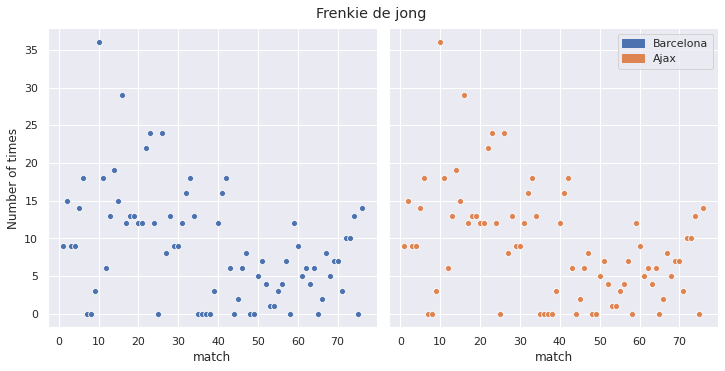

In [55]:
grid = sns.FacetGrid(tdf, col='teamId', hue='teamId', col_wrap=2, size=5)
g = grid.map(sns.scatterplot, y=tdf['count'], x=np.array(range(1,77)))
g.fig.suptitle("Frenkie de jong")
g.set_titles("")  # use this argument literally
g.set_titles("")  # use this argument literally
g.set_axis_labels(x_var="match", y_var="Number of times")

# The color cycles are going to all the same, doesn't matter which axes we use
Ax = g.axes[1]
legend_labels  = ['Barcelona',"Ajax"]
Boxes = [item for item in Ax.get_children()
         if isinstance(item, mpl.patches.Rectangle)][:-1]
# Create the legend patches
legend_patches = [mpl.patches.Patch(color=C, label=L) for
                  C, L in zip([g.axes[0].get_children()[0].get_facecolor(),g.axes[1].get_children()[0].get_facecolor()],
                              legend_labels)]
# Plot the legend
plt.legend(handles=legend_patches)
# plt.savefig(f'/work/output/21.png', dpi=200, bbox_inches="tight")

### Bar plot (Barcelona Left Back Role)

In [2]:
def plotBar(df,ax,xLim=None,color="blue",time=None):
    df = df[df["teamId"]==65]
    if time is not None:
        df = df[df["minute"]<time]
    elif xLim is not None:
        df = df[(df["x"] >= xLim[0])&(df["x"] <= xLim[1])]
        
    touchNums = [len(df[(df["y"]>=0)&(df["y"]<26.666666666666668)]),
                 len(df[(df["y"]>=26.666666666666668)&(df["y"]<(26.666666666666668*2))]),
                 len(df[(df["y"]>=(26.666666666666668*2))&(df["y"]<(26.666666666666668*3))])]
    touchPer = np.array(touchNums) / np.array(touchNums).sum() * 100
    loc = [15,
           40,
           65]
    # axes[0].set_xlim(120)
    locX = 15
    locY = 50
#     fig.patches.extend([
#         plt.Rectangle(
#         (ax.get_position().x0+.025,ax.get_position().y1-.115),.12,.04,fill=False, alpha=1,
#         linestyle="--", edgecolor="#cccccc", linewidth=1.5, zorder=99,
#         transform=fig.transFigure, figure=fig)
#     ])
#     ax.text(s=f"passes: {np.array(touchNums).sum()}",color="gold",zorder=12,
#             x=40,y=81,fontsize=20,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)
    for i in range(3):
        ax.scatter(locX,locY,edgecolor="#ffffff",facecolor="#333333",s=2000,marker="h",linewidth=1,linestyle="-.",label='Mål',zorder=10)  
        ax.text(s=f"{str(round(touchPer[i]))[:2]}%",color="gold",zorder=12,
                x=locX,y=locY,fontsize=20,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)
        locX += 25
    ax.bar(loc,[59,59,59],width=20.5,
            align='center', color="#555555",alpha=.7, linewidth=2, zorder=5)
    ax.bar(loc,touchPer,width=14.5,
            align='center',color=color,alpha=1,linewidth=2, zorder=5)
#     title = df["opponent"].tolist()[0]
#     ax.text(s=f"vs {title}",color="#cccccc",x=40,y=128,fontsize=14,horizontalalignment='center',verticalalignment='center',fontproperties=monoBFont.prop)

In [3]:
fig, axes = plt.subplots(2,4,figsize=(21,18))
fig.set_facecolor('#131313')
pitch = VerticalPitch(
    pitch_type='statsbomb',
    orientation='vertical',
    goal_type = 'box',
    pitch_color = pitchColor,
    line_color = pitchLineColor, 
    figsize=(13.5,8),
    constrained_layout = True,
    tight_layout = False,
    line_zorder=1, linewidth=0.5
)
axes = axes.ravel()
for i in range(len(axes)):
    pitch.draw(ax=axes[i])
    axes[i].invert_xaxis()
        
idx = 0
opponentList = [21,22,23,24,25]
# opponentList = [20,21,22,23]

for i in opponentList:
    df = pd.read_csv(f"/work/assets/whoscored/{teamName}/match/{season}/eventsData/new/{season}#{i}.csv")
    df['x']=df['x']*1.2
    df['endX']=df['endX']*1.2
    df['y']=df['y']*0.8
    df['endY']=df['endY']*0.8
    df['dist']=np.sqrt((df["endX"]-df["x"])**2 + (df["endY"]-df["y"])**2)
#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("passKey",na=False)]
#     df = df[df["satisfiedEventsTypes"].apply(str).str.contains("touch",na=False)]
    df = df[(df["satisfiedEventsTypes"].apply(str).str.contains("passAccurate",na=False))|(df["satisfiedEventsTypes"].apply(str).str.contains("passInaccurate",na=False))]

#     plotHeatmap(df,axes[idx])
    plotPassMap(df,axes[idx],xLim=(0,120),time=95)
    plotBar(df,axes[idx],xLim=(0,120),color=homeColor,time=95)
    idx+=1
    
path_eff = [path_effects.Stroke(linewidth=1, foreground='#ffffff'),
            path_effects.Normal()]
    
fig_text(s=f"Sergiño Dest's performance",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.05,
         color="#ffffff",
#          highlight_colors=["#ffffff"],
#          highlight_weights=["bold"],
#          highlight_styles=["italic"],
         fontsize=22,
         fontproperties=monoBFont.prop,fig=fig)

fig_text(s=f"<{teamName.title()} vs Athletic Bilbao | La Liga 21-22 | Created by: @Bucciaratimes>",
         x=axes[0].get_position().x0+.1,y=axes[0].get_position().y1+.035,
         color="#8C898C",
         highlight_colors=["#AB8E40"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

fig.patches.extend([
        plt.Rectangle(
        (axes[0].get_position().x0,axes[0].get_position().y0-.095),.8,.075,fill=False, alpha=1,
        linestyle=":", edgecolor="#cccccc", linewidth=1.5, zorder=99,
        transform=fig.transFigure, figure=fig)
    ])

fig_text(s=f" <Note>: I thought When Alba missed match, Barca's left side wouldn't work well.\n \
But I was wrong. Sergino Dest was the perfect replacement for Alba.\n \
He was rumored to be leaving in January, but he can take over the RB and LB position from Alves and Alba. Great talent!",
         x=axes[0].get_position().x0,y=axes[0].get_position().y0-.078,
         color="#ffffff",
         highlight_colors=["gold"],
         highlight_weights=["bold"],
         highlight_styles=["italic"],
         fontsize=14,
         fontproperties=monoBFont.prop,fig=fig)

# plotVerticalAndKeyPassMap(df,379205,axes[1])
# plotConvexfull(df,379205,axes[1])
# plotScatterMap(df,379205,axes[1])
ax_image = add_image(
    mark, fig, left=axes[0].get_position().x0, bottom=axes[0].get_position().y1, width=0.1, height=0.1, alpha=.9)  
# plotBinStatHeatmap(pitch,axes[1],df,379205,monoBFont.prop,cmapA,alpha=1)
# fig_text(x=0.51, y=0.92, s=f'<touch area>',
#          fontsize=58, ha='center', highlight_colors=["gray"], highlight_weights=['bold'])#, path_effects=path_eff_1)
# fig_text(x=0.51, y=0.89, s=f'Laliga 21/22 | Gameweek 1~5',
#          fontsize=24, ha='center', color='gray')#, path_effects=path_eff)
# fig_text(x=0.51, y=0.82, s=f'<{teamName}>'.title(),
#          fontsize=48, ha='center', highlight_colors=[homeColor], highlight_weights=['bold'], path_effects=path_eff)


# plt.savefig(f'/work/output/barcelona/distribution.png', dpi=200, bbox_inches="tight",facecolor='#131313')

NameError: name 'plt' is not defined

In [9]:
pd.read_csv("/work/assets/xT_Grid.csv",header=None)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
1,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
2,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
3,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
4,0.009411,0.010827,0.010165,0.011324,0.012626,0.014846,0.016895,0.019971,0.023851,0.035113,0.108051,0.257454
5,0.008880,0.009777,0.010013,0.011105,0.012692,0.014291,0.016856,0.019351,0.024122,0.028552,0.054911,0.064426
6,0.007501,0.008786,0.009424,0.010595,0.012147,0.013845,0.016118,0.018703,0.024015,0.029533,0.040670,0.046477
7,0.006383,0.007796,0.008449,0.009777,0.011263,0.012483,0.014736,0.017451,0.021221,0.027563,0.034851,0.037926
